# Importing important libraries 

In [2]:
import pandas as pd
import numpy as np
import warnings
from pandas import read_csv
from collections import Counter
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# spot check machine learning algorithms on the adult imbalanced dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

# Importing dataset 

In [4]:
# define the dataset location
filename = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/adult-all.csv'
# load the csv file as a data frame
dataframe = read_csv(filename, header=None, na_values='?',names = column_names)

# Drop missing values

In [5]:
# drop rows with missing
dataframe = dataframe.dropna()

In [6]:
# summarize the shape of the dataset
print(dataframe.shape)

(45222, 15)


In [7]:
dataframe.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
dataframe.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [9]:
dataframe.isnull().values.any()

False

# Classifying on the basis of income 

In [9]:
# summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=<=50K, Count=34014, Percentage=75.216%
Class=>50K, Count=11208, Percentage=24.784%


# count plot

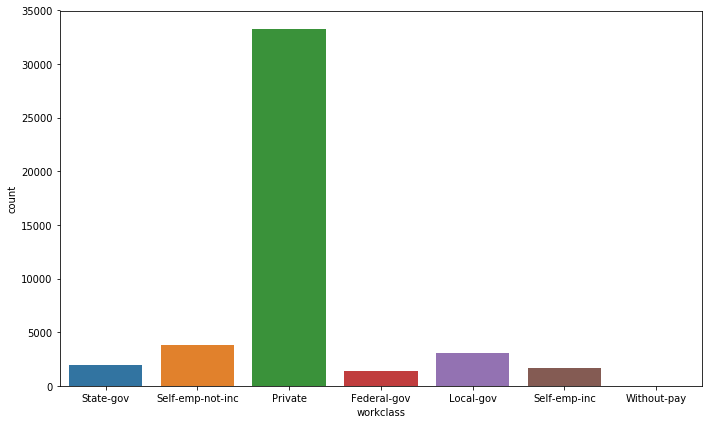

In [10]:
fig=plt.figure(figsize=(10,6))
sns.countplot('workclass',data=dataframe )
plt.tight_layout()
plt.show()

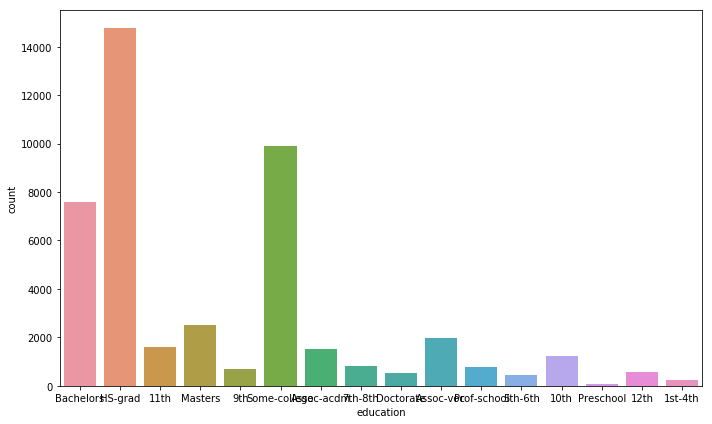

In [11]:
fig=plt.figure(figsize=(10,6))
sns.countplot('education',data=dataframe )
plt.tight_layout()
plt.show()

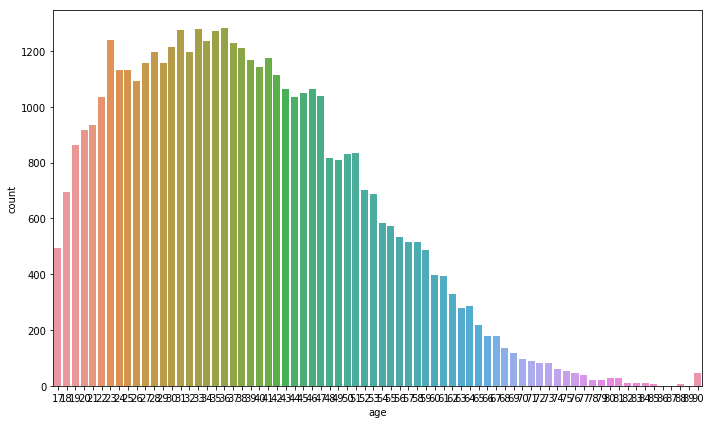

In [25]:
fig=plt.figure(figsize=(10,6))
sns.countplot('age',data=dataframe )
plt.tight_layout()
plt.show()

# Histogram

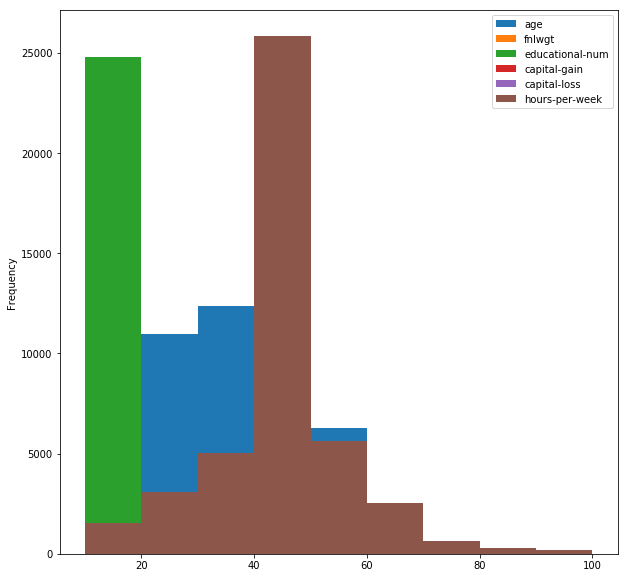

In [12]:
dataframe.plot(kind='hist',bins=[10,20,30,40,50,60,70,80,90,100],figsize=(10,10))

# Box plot 

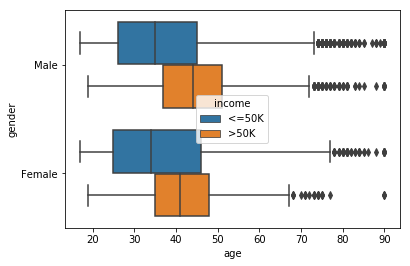

In [13]:
sns.boxplot(x="age",y="gender",hue="income",data=dataframe)

# Heatmap 

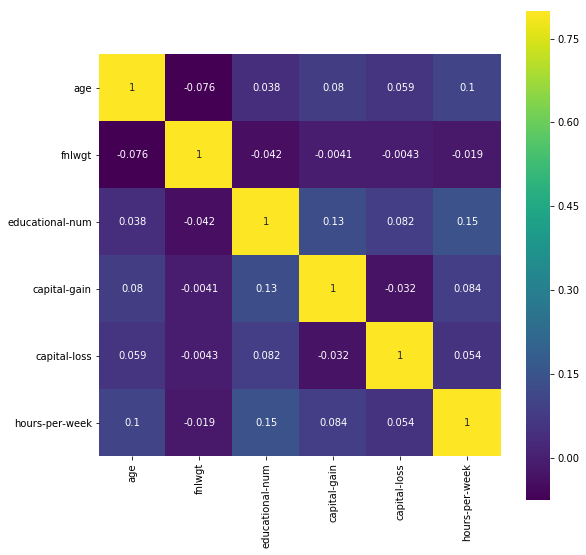

In [34]:
temp= dataframe 
temp["income"] = temp["income"].replace([' <=50K',' >50K' ] , [0,1] )
hmap = temp.corr()
plt.subplots(figsize=(9, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="viridis", square=True);

# Joint plot 

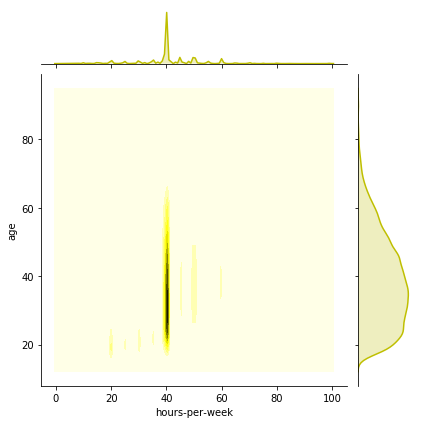

In [55]:
sns.jointplot(dataframe['hours-per-week'],dataframe['age'],kind='kde',color='y'
              ,data=dataframe)

# Factor plot

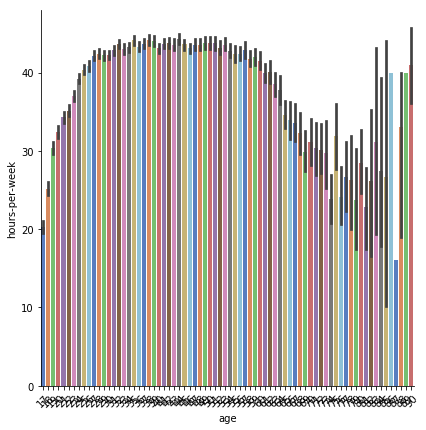

In [58]:
sns.factorplot(x="age", y="hours-per-week", data=dataframe, kind="bar", size = 6, 
palette = "muted")
plt.xticks(rotation=45);
#dff['Workclass'].value_counts()

# Histograms of each features 

<Figure size 432x288 with 0 Axes>

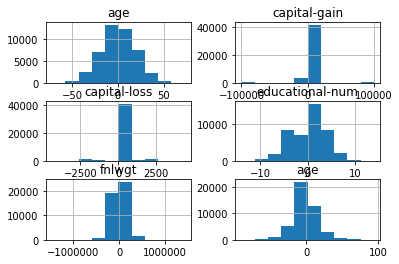

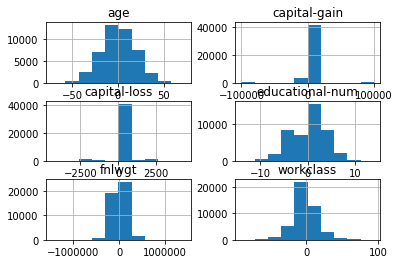

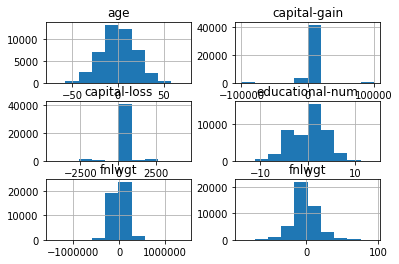

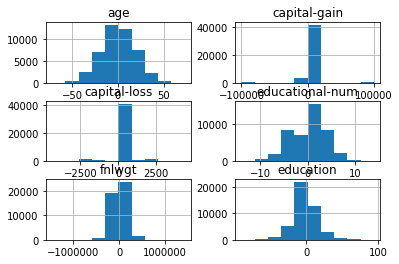

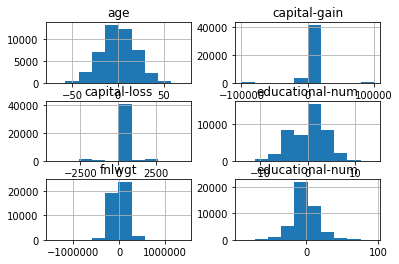

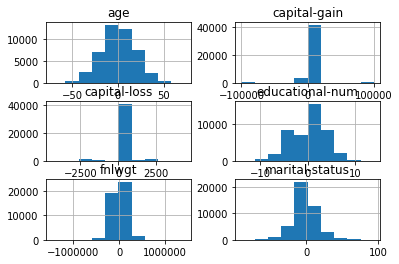

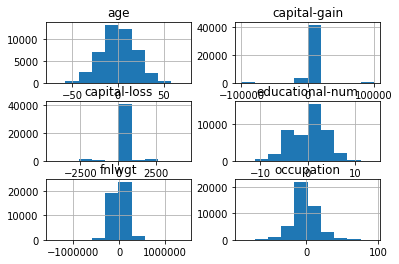

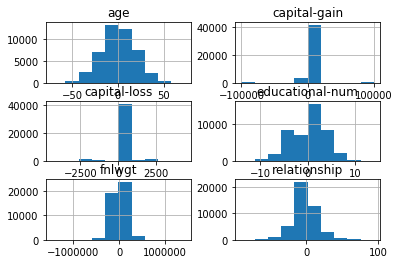

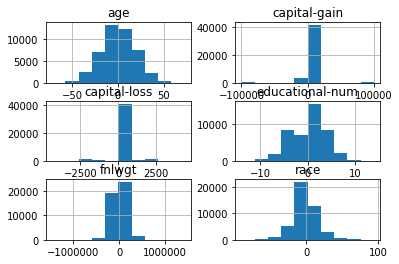

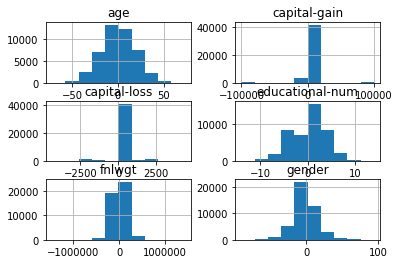

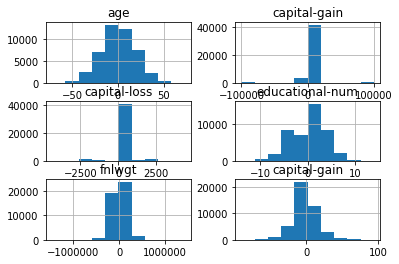

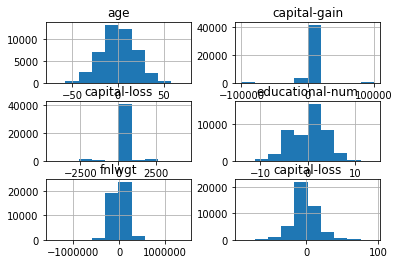

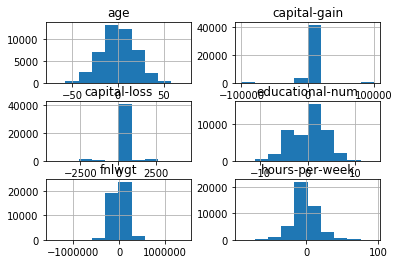

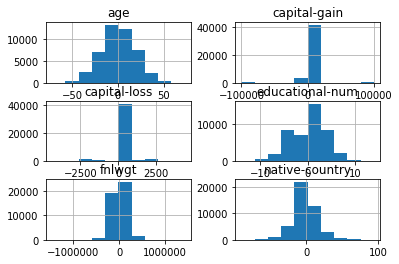

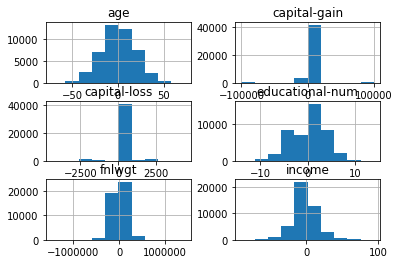

In [62]:
#making histograms of each feature
plt.figure()

for item in dataframe:
    x.diff().hist()
    plt.title(item)
    plt.show()

# Pairplot 

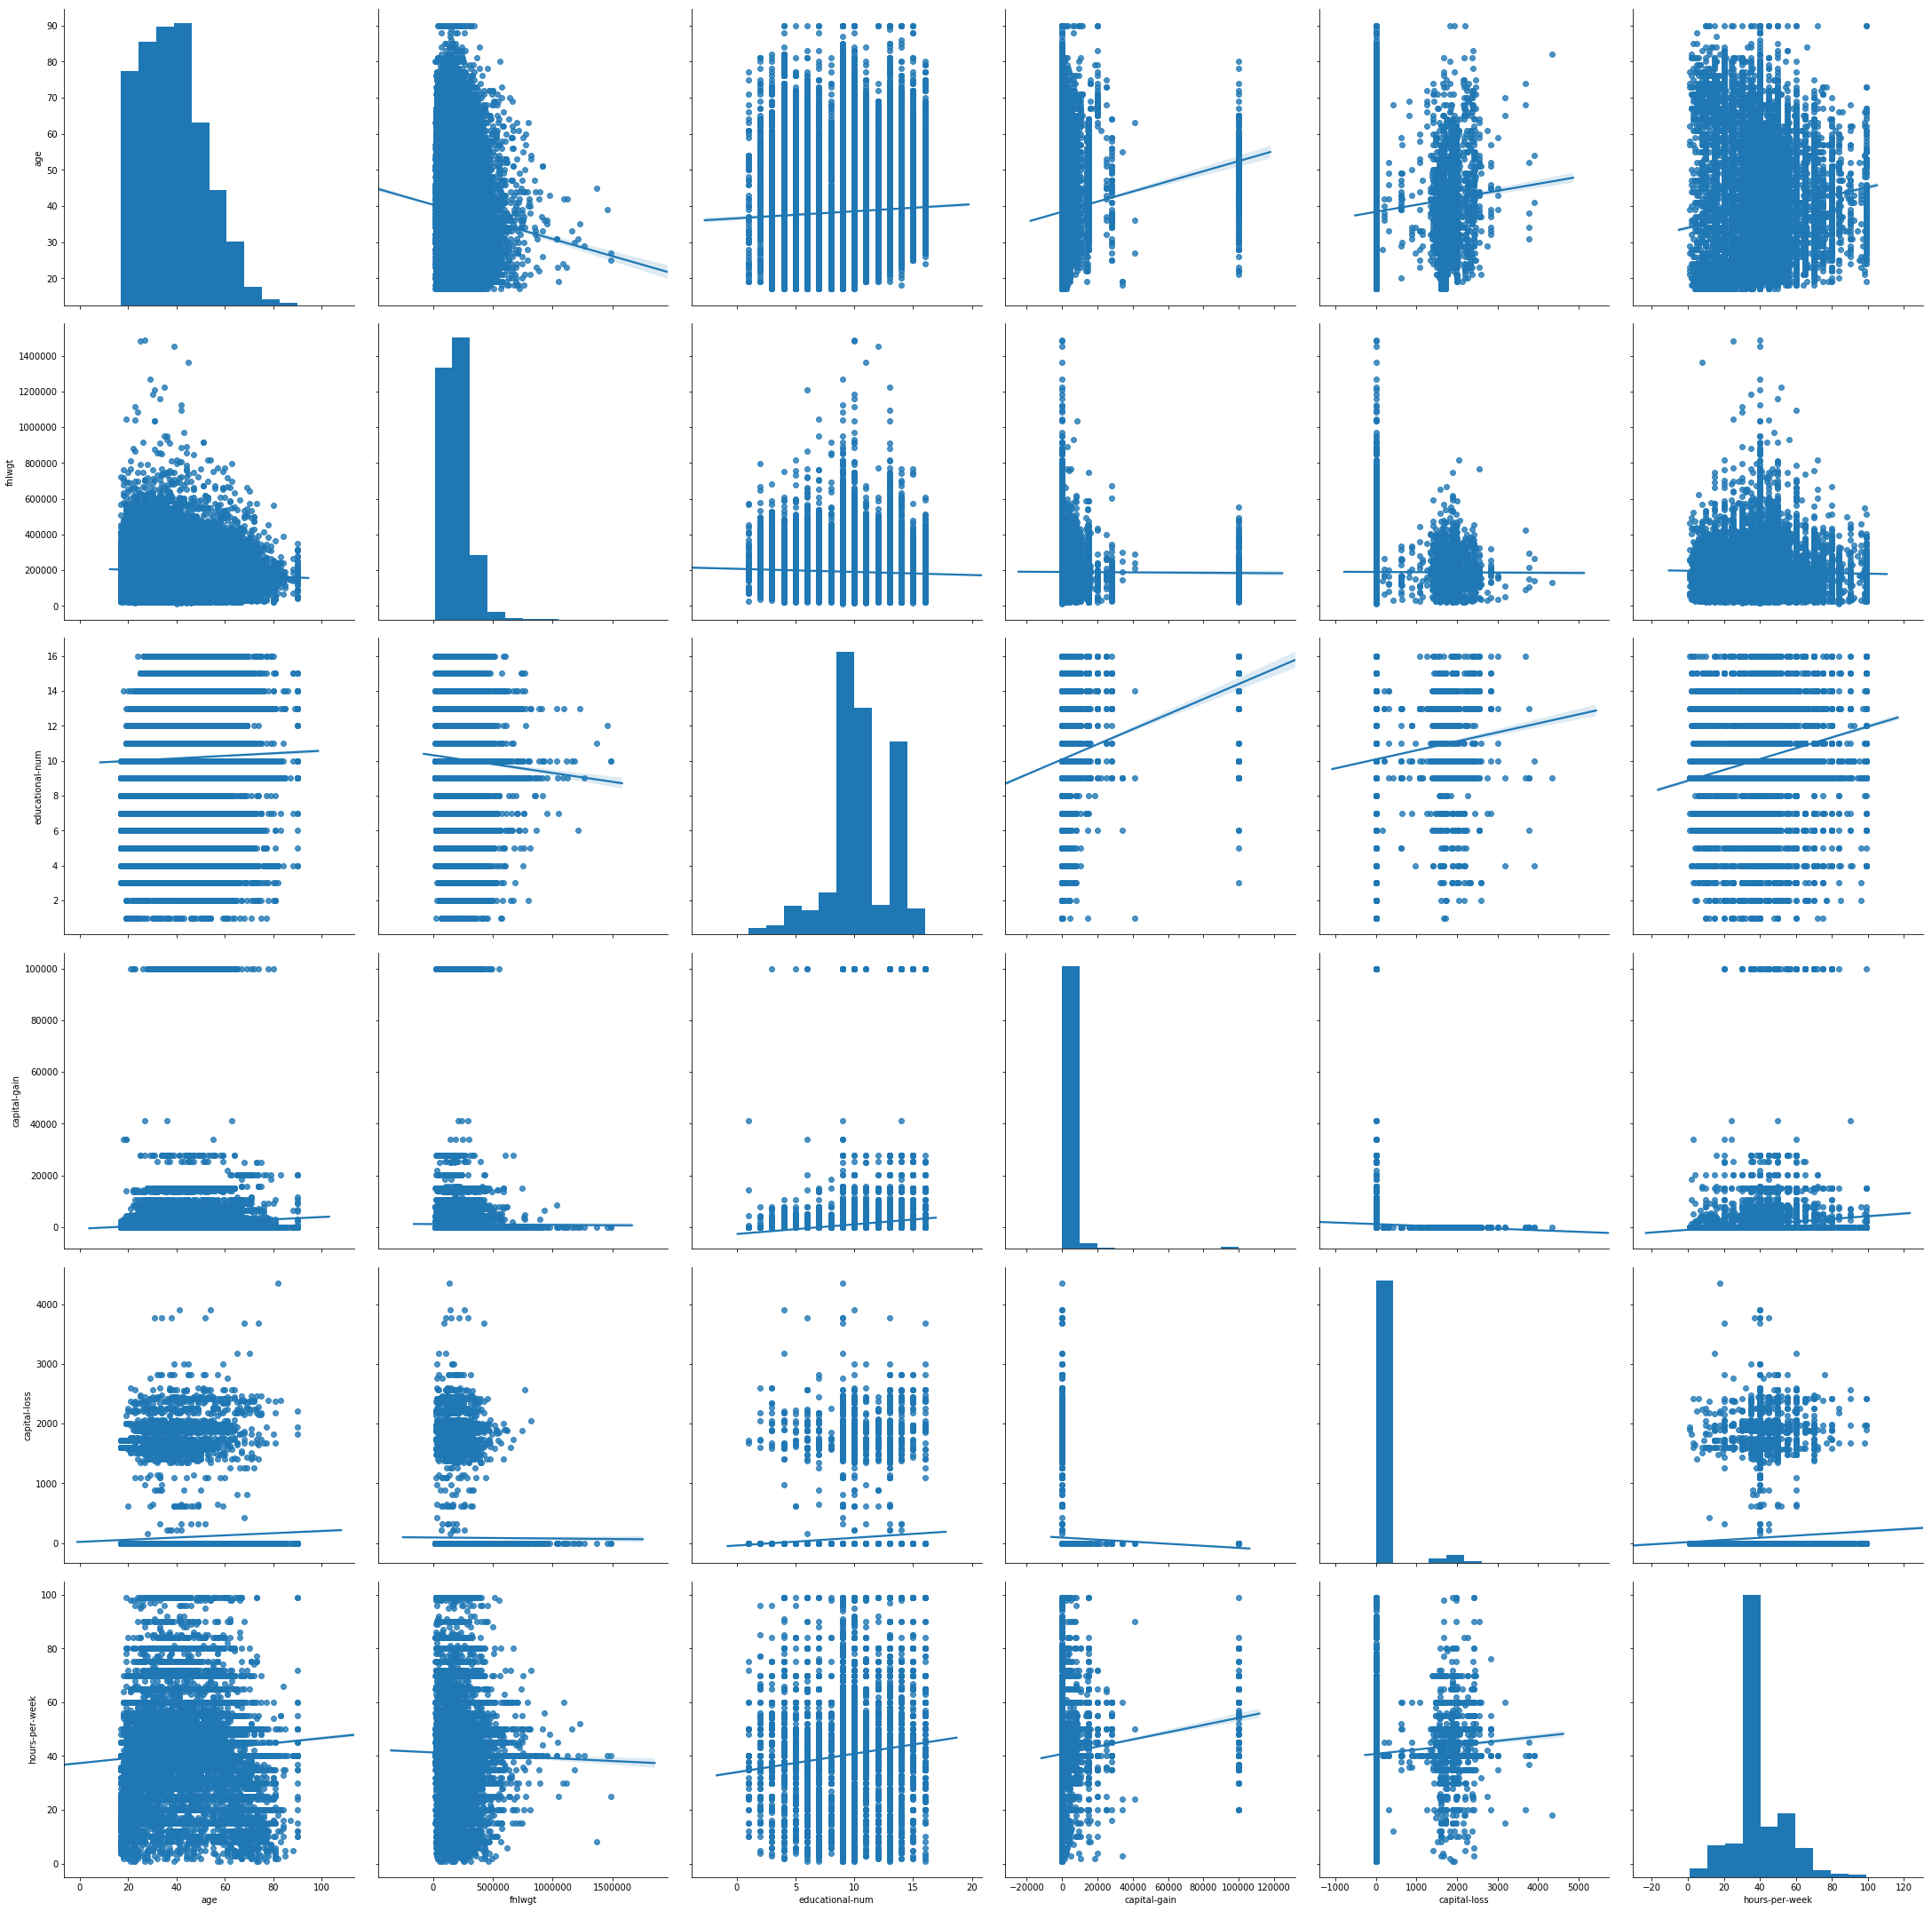

In [36]:
sns.pairplot(data=dataframe,kind='reg',size=5)

In [33]:
# select columns with numerical data types
num_ix = dataframe.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = dataframe[num_ix]

In [34]:
# test harness and baseline model evaluation for the adult dataset
from collections import Counter
from numpy import mean
from numpy import std
from numpy import hstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split 

In [35]:
dataframe=dataframe.dropna()

# classifying input and output 

In [36]:
x = dataframe.drop(['income','workclass','education','marital-status','occupation','relationship','race','gender','native-country'],axis=1)
y= dataframe['income']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [37]:
cat_ix = x.select_dtypes(include=['object', 'bool']).columns 
num_ix = x.select_dtypes(include=['int64', 'float64']).columns 
# label encode the target variable to have the classes 0 and 1
y = LabelEncoder().fit_transform(y)

# Cross Validation 

In [38]:
seed=101
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('SGDC',SGDClassifier()))
#models.append(('SVM',SVC()))
models.append (('CART',DecisionTreeClassifier()))
models.append (('BAG',BaggingClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('GBM',GradientBoostingClassifier()))
#models.append(('NB',GaussianNB()))
# Evaluating each models in turn
results = []
names = []
for name, model in models:
    cv=RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=seed)
    cv_results = cross_val_score(model, x_train, y_train,scoring='accuracy',cv=cv,n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.801885 (0.006903)
SGDC: 0.709967 (0.182042)
CART: 0.767093 (0.005106)
BAG: 0.805802 (0.005321)
LR: 0.791366 (0.004980)
GBM: 0.835845 (0.005095)


# 1.Logistic Regression 

In [42]:
from sklearn.metrics import classification_report, confusion_matrix
logistic = LogisticRegression()
logistic.fit(x_train,y_train)
y_pred=logistic.predict(x_test)
print(classification_report(y_test,y_pred))
accuracy1=logistic.score(x_test,y_test)
print (accuracy1*100,'%')

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.87     10150
        >50K       0.73      0.27      0.40      3417

   micro avg       0.79      0.79      0.79     13567
   macro avg       0.76      0.62      0.64     13567
weighted avg       0.78      0.79      0.75     13567

79.155303309501 %


# 2.Decision Tree Classifier 

In [48]:
des_class=DecisionTreeClassifier()
des_class.fit(x_train,y_train)
des_predict=des_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87     10150
        >50K       0.63      0.49      0.55      3417

   micro avg       0.80      0.80      0.80     13567
   macro avg       0.73      0.70      0.71     13567
weighted avg       0.79      0.80      0.79     13567

79.81867767376723 %


# 3.Bagging Classifier 

In [49]:
Bag=BaggingClassifier()
Bag.fit(x_train,y_train)
Bag_predict=Bag.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87     10150
        >50K       0.63      0.49      0.55      3417

   micro avg       0.80      0.80      0.80     13567
   macro avg       0.73      0.70      0.71     13567
weighted avg       0.79      0.80      0.79     13567

79.81867767376723 %


# 4.Random Forest classifier 

In [43]:
from sklearn.ensemble import RandomForestClassifier 
ran_class=RandomForestClassifier()
ran_class.fit(x_train,y_train)
ran_predict=ran_class.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87     10150
        >50K       0.63      0.49      0.55      3417

   micro avg       0.80      0.80      0.80     13567
   macro avg       0.73      0.70      0.71     13567
weighted avg       0.79      0.80      0.79     13567

79.81867767376723 %


# 5.SGD Classifier

In [50]:
Sgdc=SGDClassifier()
Sgdc.fit(x_train,y_train)
Sgdc_predict=Sgdc.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87     10150
        >50K       0.63      0.49      0.55      3417

   micro avg       0.80      0.80      0.80     13567
   macro avg       0.73      0.70      0.71     13567
weighted avg       0.79      0.80      0.79     13567

79.81867767376723 %


# 6.Gradient Boosting Classifier 

In [51]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_predict=gbc.predict(x_test)
print(classification_report(y_test,ran_predict))
accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

              precision    recall  f1-score   support

       <=50K       0.84      0.90      0.87     10150
        >50K       0.63      0.49      0.55      3417

   micro avg       0.80      0.80      0.80     13567
   macro avg       0.73      0.70      0.71     13567
weighted avg       0.79      0.80      0.79     13567

79.81867767376723 %
